# Step 0.1. Import necessary libraries 

In [ ]:
!pip install -U lightautoml

     |████████████████████████████████| 296 kB 13.3 MB/s 
     |████████████████████████████████| 215 kB 70.5 MB/s 
     |████████████████████████████████| 1.2 MB 68.5 MB/s 
     |████████████████████████████████| 9.5 MB 59.7 MB/s 
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
     |████████████████████████████████| 804.1 MB 3.1 kB/s 
     |████████████████████████████████| 425 kB 73.1 MB/s 
     |████████████████████████████████| 308 kB 69.6 MB/s 
     |████████████████████████████████| 2.8 MB 43.2 MB/s 
     |████████████████████████████████| 81 kB 7.6 MB/s 
     |████████████████████████████████| 210 kB 73.6 MB/s 
     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 113 kB 71.7 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 146 kB 70.1 MB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |█████████████

In [ ]:
!pip install tsfresh

     |████████████████████████████████| 97 kB 3.6 MB/s 
     |████████████████████████████████| 9.8 MB 78.4 MB/s 
     |████████████████████████████████| 837 kB 51.8 MB/s 
     |████████████████████████████████| 136 kB 73.9 MB/s 
     |████████████████████████████████| 1.1 MB 72.7 MB/s 
     |████████████████████████████████| 136 kB 77.6 MB/s 
     |████████████████████████████████| 830 kB 54.5 MB/s 
     |████████████████████████████████| 822 kB 66.8 MB/s 
     |████████████████████████████████| 802 kB 58.5 MB/s 
     |████████████████████████████████| 802 kB 57.3 MB/s 
     |████████████████████████████████| 793 kB 42.1 MB/s 
     |████████████████████████████████| 793 kB 60.9 MB/s 
     |████████████████████████████████| 791 kB 63.5 MB/s 
     |████████████████████████████████| 786 kB 67.9 MB/s 
     |████████████████████████████████| 779 kB 67.9 MB/s 
     |████████████████████████████████| 778 kB 73.1 MB/s 
     |████████████████████████████████| 776 kB 70.8 MB/s 
     |██████████

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Standard python libraries
import logging
import os
import glob
import time
logging.basicConfig(format='[%(asctime)s] (%(levelname)s): %(message)s', level=logging.INFO)

# Installed libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import log_loss
import torch

# Imports from our package
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task
#from lightautoml.utils.profiler import Profiler

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas import Series
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.transformers import RelevantFeatureAugmenter
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series, make_forecasting_frame
from tsfresh.feature_extraction import settings


[2022-05-01 12:18:42,421] (INFO): init
[2022-05-01 12:18:42,491] (ERROR): Call to cuInit results in CUDA_ERROR_NO_DEVICE


ContextualVersionConflict: ignored

# Step 0.2. Parameters 

In [ ]:
N_THREADS = 8 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 42 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 2*3600 # Time in seconds for automl run
TARGET_NAME = 'RUL' # Target column name

In [ ]:
settings_minimal = settings.MinimalFCParameters()
settings_minimal

NameError: ignored

In [ ]:
# settings_index = settings.IndexBasedFCParameters()
# settings_index.update(settings_minimal)
# settings_index

In [ ]:
# settings_efficient = settings.EfficientFCParameters()

In [ ]:
# settings_comprehensive = settings.ComprehensiveFCParameters()

# Step 0.3. Fix torch number of threads and numpy seed 

In [ ]:
np.random.seed(RANDOM_STATE)
torch.set_num_threads(N_THREADS)

# Step 0.4. Change profiling decorators settings 

In [ ]:
# p = Profiler()
# p.change_deco_settings({'enabled': True})

# Step 0.5. Example data load 

In [ ]:
usecols = ['ID', 'Date/Time', 'StuckPipe', 'BPOS', 'HKLD', 'STOR', 'RPM', 'SPPA']

In [ ]:
%%time

pd.set_option('display.max_columns', None)
# DATA_PATH = r'D:\Python\cloveri\Буровая\Данные'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clovery/df.csv', usecols = usecols)

CPU times: user 41.4 ms, sys: 21.9 ms, total: 63.3 ms
Wall time: 546 ms


In [ ]:
df.head()

,ID,Date/Time,StuckPipe,BPOS,HKLD,STOR,RPM,SPPA
0,0,2013-10-15 08:55:00,NaN,10.8234,58.8718,19.60,39.22,142.2581
1,0,2013-10-15 08:55:00,NaN,10.8234,59.1076,13.32,22.45,126.3237
2,0,2013-10-15 08:55:00,NaN,10.8234,60.0602,6.52,5.66,89.7091
3,0,2013-10-15 08:55:00,NaN,10.8234,61.5117,3.35,6.74,52.4319
4,0,2013-10-15 08:55:00,NaN,10.8234,62.8452,2.39,0.07,26.5228


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33054 entries, 0 to 33053
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         33054 non-null  int64  
 1   Date/Time  33054 non-null  object 
 2   StuckPipe  1587 non-null   float64
 3   BPOS       33054 non-null  float64
 4   HKLD       33054 non-null  float64
 5   STOR       33054 non-null  float64
 6   RPM        33054 non-null  float64
 7   SPPA       33054 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,ID,StuckPipe,BPOS,HKLD,STOR,RPM,SPPA
count,33054.000000,1587.0,33054.000000,33054.000000,33054.000000,33054.000000,33054.000000
mean,88.293429,1.0,-93.322406,-84.867243,-3.752235,60.880385,118.701441
std,51.691735,0.0,312.773060,352.136756,148.041134,61.455720,84.744272
min,0.000000,1.0,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,43.000000,1.0,2.036025,21.563800,2.462035,12.990000,43.206975
50%,87.000000,1.0,10.526250,54.630700,21.850000,79.580000,150.230100
75%,134.000000,1.0,23.798100,60.051100,26.070000,100.270000,183.471100
max,177.000000,1.0,34.329600,110.100500,61.852000,204.770000,294.815200


In [ ]:
df.shape

(33054, 8)

In [ ]:
df['ds'] = pd.date_range(start='2013-10-15 08:55:00', periods=33054, freq="10S")

In [ ]:
df['StuckPipe'] = df['StuckPipe'].fillna(0)
# df['SPPA'] = df['SPPA'].apply(lambda x: x * 0.01)  # 1 kPa = 0.01 atm
# df = df.drop(columns=['FLWI'])
df = df.replace(-999.25, 0) 
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
# df['ID'] = df['Date/Time'].dt.hour
# df['RUL'] = df.groupby('ID').cumcount(ascending=False)
s = df['StuckPipe'].iloc[::-1].cumsum()
df['RUL'] = s.groupby(s).cumcount()

In [ ]:
df['RUL'].describe()

count    33054.000000
mean        89.867278
std         61.718944
min          0.000000
25%         38.000000
50%         85.000000
75%        136.000000
max        352.000000
Name: RUL, dtype: float64

In [ ]:
df['RUL'] = df['RUL'].apply(lambda x: 85 if x >= 85 else x)

In [ ]:
df.head()

,ID,Date/Time,StuckPipe,BPOS,HKLD,STOR,RPM,SPPA,ds,RUL
0,0,2013-10-15 08:55:00,0.0,10.8234,58.8718,19.60,39.22,142.2581,2013-10-15 08:55:00,85
1,0,2013-10-15 08:55:00,0.0,10.8234,59.1076,13.32,22.45,126.3237,2013-10-15 08:55:10,85
2,0,2013-10-15 08:55:00,0.0,10.8234,60.0602,6.52,5.66,89.7091,2013-10-15 08:55:20,85
3,0,2013-10-15 08:55:00,0.0,10.8234,61.5117,3.35,6.74,52.4319,2013-10-15 08:55:30,85
4,0,2013-10-15 08:55:00,0.0,10.8234,62.8452,2.39,0.07,26.5228,2013-10-15 08:55:40,85


In [ ]:
# df['ds'] = df['Date/Time'] 
# df = df.set_index('ds').resample('30S').max()
# df.dropna(inplace=True)
# df = df.reset_index()

In [ ]:
# df.head(5)

# Step 0.6. Data splitting for train-test 

Block below can be omitted if you are going to train model only or you have specific train and test files:

In [ ]:
df['RUL'] = np.log(df['RUL'] + 1)

[2022-05-01 12:25:25,640] (INFO): NumExpr defaulting to 2 threads.


In [ ]:
df = df.drop(columns=['Date/Time', 'StuckPipe'])

In [ ]:
%%time

# train_data = df.loc[df['ID'] <= 121]
# test_data = df.loc[df['ID'] > 121]

train_data, test_data = train_test_split(df, 
                                         test_size=TEST_SIZE, 
                                         random_state=RANDOM_STATE)

train_data = train_data.drop(columns=['ID', 'ds'])
test_data = test_data.drop(columns=['ID', 'ds'])

logging.info('Data splitted. Parts sizes: train_data = {}, test_data = {}'
              .format(train_data.shape, test_data.shape))

[2022-05-01 12:25:31,665] (INFO): Data splitted. Parts sizes: train_data = (26443, 6), test_data = (6611, 6)


CPU times: user 7.74 ms, sys: 1.99 ms, total: 9.73 ms
Wall time: 10.6 ms


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26443 entries, 23775 to 15795
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BPOS    26443 non-null  float64
 1   HKLD    26443 non-null  float64
 2   STOR    26443 non-null  float64
 3   RPM     26443 non-null  float64
 4   SPPA    26443 non-null  float64
 5   RUL     26443 non-null  float64
dtypes: float64(6)
memory usage: 1.4 MB


# === AutoML preset usage ====

## Step 1. Create Task

In [ ]:
%%time

task = Task('reg') # default
# task = Task('reg', loss='quantile', loss_params={'q': 0.7}, metric='quantile')

CPU times: user 2.05 ms, sys: 0 ns, total: 2.05 ms
Wall time: 2.06 ms


##` Step 2. Setup columns roles

Roles setup here set target column and base date, which is used to calculate date differences:

In [ ]:
%%time

roles = {'target': TARGET_NAME, 
         'drop': ['ID', 'ds'],
}

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


## Step 3. Create AutoML from preset

To create AutoML model here we use `TabularAutoML` preset, which looks like:

All params we set above can be send inside preset to change its configuration:

In [ ]:
%%time 
global automl
automl = TabularAutoML(task = task, 
                       timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
                       reader_params = {'n_jobs': N_THREADS})

oof_pred = automl.fit_predict(train_data, roles = roles)
print('oof_pred:\n{}\nShape = {}'.format(oof_pred[:10], oof_pred.shape))

Streaming output truncated to the last 5000 lines.
[2022-05-01 12:43:06,425] (DEBUG): 268:	learn: 0.7814635	test: 0.8519974	best: 0.8519974 (268)	total: 1.6s	remaining: 16.3s
[2022-05-01 12:43:06,432] (DEBUG): 269:	learn: 0.7812686	test: 0.8519942	best: 0.8519942 (269)	total: 1.61s	remaining: 16.3s
[2022-05-01 12:43:06,440] (DEBUG): 270:	learn: 0.7808973	test: 0.8516133	best: 0.8516133 (270)	total: 1.61s	remaining: 16.3s
[2022-05-01 12:43:06,447] (DEBUG): 271:	learn: 0.7807001	test: 0.8515294	best: 0.8515294 (271)	total: 1.62s	remaining: 16.3s
[2022-05-01 12:43:06,457] (DEBUG): 272:	learn: 0.7804863	test: 0.8514003	best: 0.8514003 (272)	total: 1.63s	remaining: 16.3s
[2022-05-01 12:43:06,465] (DEBUG): 273:	learn: 0.7801984	test: 0.8512046	best: 0.8512046 (273)	total: 1.63s	remaining: 16.3s
[2022-05-01 12:43:06,470] (DEBUG): 274:	learn: 0.7800450	test: 0.8510560	best: 0.8510560 (274)	total: 1.64s	remaining: 16.2s
[2022-05-01 12:43:06,480] (DEBUG): 275:	learn: 0.7798195	test: 0.8508499	be

oof_pred:
array([[2.4559042 ],
       [0.00709616],
       [4.3947444 ],
       [3.2614307 ],
       [4.4696975 ],
       [4.575159  ],
       [3.5126624 ],
       [4.5993886 ],
       [3.5877922 ],
       [3.5368772 ]], dtype=float32)
Shape = (26443, 1)
CPU times: user 17min 57s, sys: 1min 39s, total: 19min 36s
Wall time: 17min 42s


## Step 4. Predict to test data and check scores

In [ ]:
%%time

test_pred = automl.predict(test_data)

print('Prediction for test data:\n{}\nShape = {}'.format(test_pred[:10], test_pred.shape))

# print('Check scores...')
# print('OOF score: {}'.format(mean_squared_error(train_data['RUL'].values, oof_pred.data[:, 0]) ** 0.5))
# print('TEST score: {}'.format(mean_squared_error(test_data['RUL'].values, test_pred.data[:, 0]) ** 0.5))


Prediction for test data:
array([[4.3877974],
       [4.009997 ],
       [3.8908563],
       [2.3481603],
       [4.2303357],
       [4.500551 ],
       [4.1370125],
       [4.509612 ],
       [4.374361 ],
       [4.45805  ]], dtype=float32)
Shape = (6611, 1)
CPU times: user 11.3 s, sys: 20.8 ms, total: 11.4 s
Wall time: 5.92 s


CPU times: user 40.1 ms, sys: 1.96 ms, total: 42.1 ms
Wall time: 49.1 ms


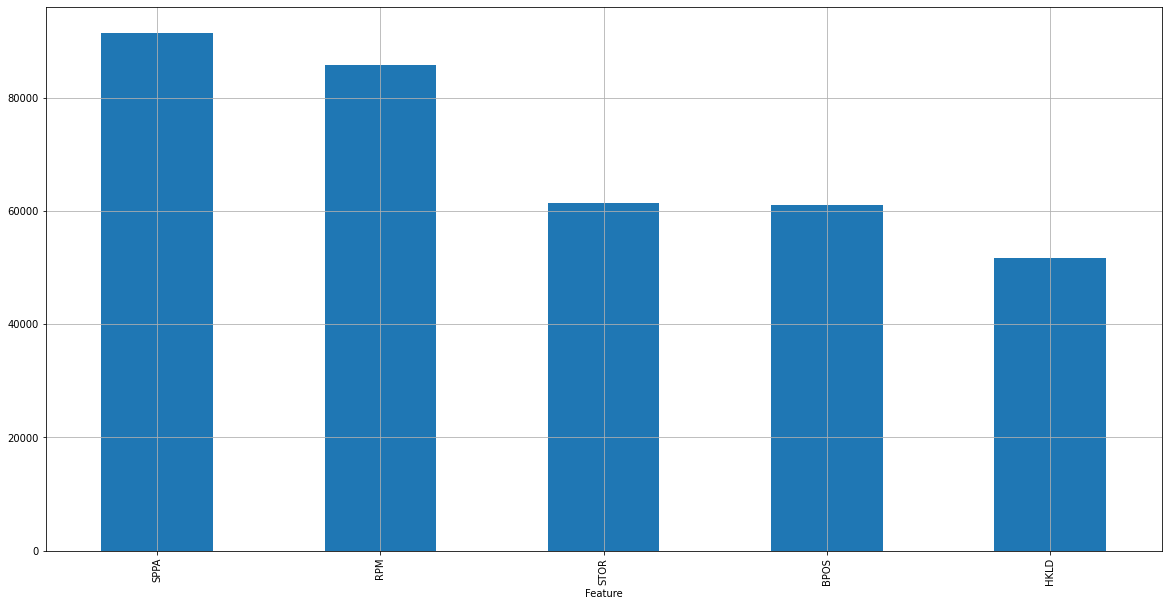

In [ ]:
%%time

# Fast feature importances calculation

fast_fi = automl.get_feature_scores('fast', silent = False)
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

fast_fi.head(20)

# Appendix 1. Profiling report screenshots 

After loading HTML with profiling report, you can see fully folded report (please wait for green LOAD OK text for full load finish). If you click on triangle on the left, it unfolds and look like Profiling report on different level

# Appendix 2. Standart report from sklearn 

Подсчитаем дополнительные метрики для регрессии в целях лучшего понимания качества модели.

__R ^ 2 (коэффициент детерминации) функция оценки регрессии.__    

Наилучшая возможная оценка - 1.0, если же модель всегда предсказывает ожидаемое значение, игнорируя входные характеристики, то она получит оценку R ^ 2, равную 0.0.

In [ ]:
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(train_data['RUL'].values, oof_pred.data[:, 0]), 
        r2_score(test_data['RUL'].values, test_pred.data[:, 0])))

R^2 train: 0.737, test: 0.746


__median_absolute_error средняя абсолютная ошибка.__     

Оценка особенно интересна, потому что устойчива к выбросам. Убыток рассчитывается путем взятия медианы всех абсолютных различий между целью и прогнозом.

In [ ]:
print('Median_Absolute_Error   train: {:.3f}, test: {:.3f}'.format(
        median_absolute_error(train_data['RUL'].values, oof_pred.data[:, 0]), 
        median_absolute_error(test_data['RUL'].values, test_pred.data[:, 0])))


Median_Absolute_Error   train: 0.140, test: 0.125


In [ ]:
from sklearn.metrics import max_error
print('Maximum residual error   train: {:.3f}, test: {:.3f}'.format(
        max_error(train_data['RUL'].values, oof_pred.data[:, 0]), 
        max_error(test_data['RUL'].values, test_pred.data[:, 0])))

Maximum residual error   train: 4.548, test: 4.127


__Разброс целевых значений датасета (логарифм)__

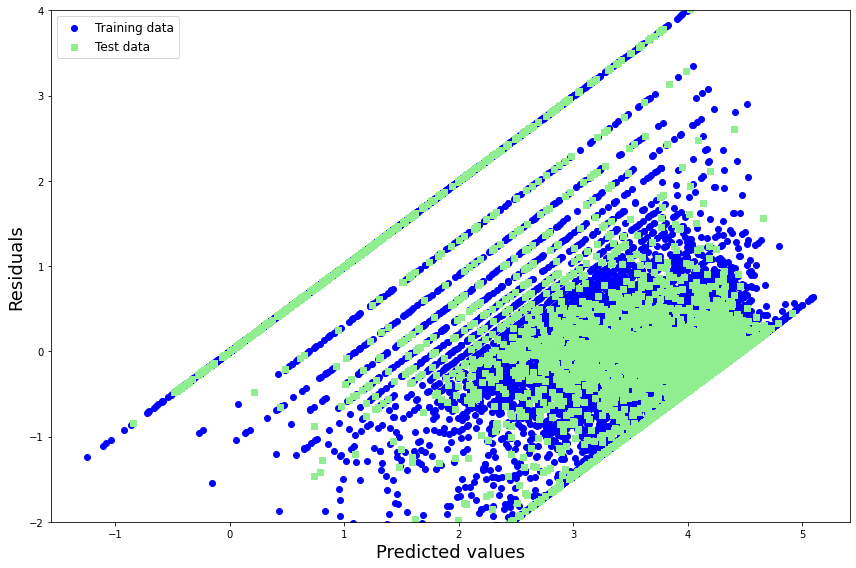

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(oof_pred.data[:, 0],  oof_pred.data[:, 0] - train_data['RUL'].values,
            c='blue', marker='o', label='Training data')
plt.scatter(test_pred.data[:, 0],  test_pred.data[:, 0] - test_data['RUL'].values,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.legend(loc='upper left', prop={'size':12})
plt.ylim([-2, 4])
plt.tight_layout()

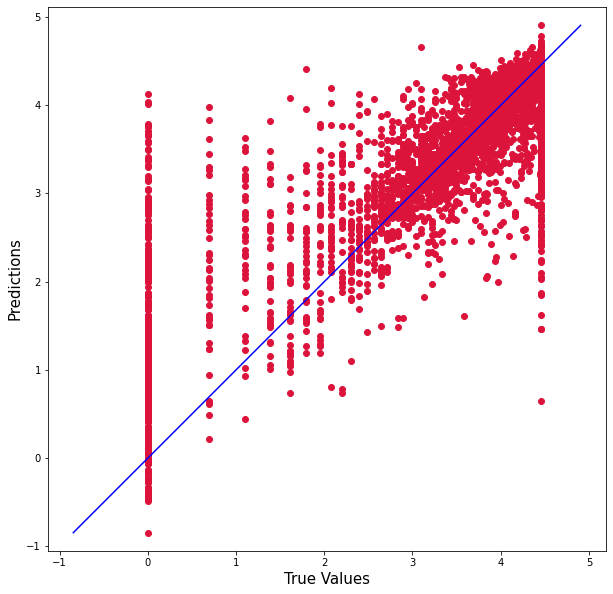

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(test_data['RUL'].values, test_pred.data[:, 0], c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(test_pred.data[:, 0]), max(test_data['RUL'].values))
p2 = min(min(test_pred.data[:, 0]), min(test_data['RUL'].values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Save the model to disk

In [ ]:
# import pickle

# with open('AutoML_model_finalz5.pkl', 'wb') as f:
#     pickle.dump(automl, f)

In [ ]:
# import pickle

# filename = 'AutoML_model_finalz5.sav'
# pickle.dump(automl, open(filename, 'wb'))

In [ ]:
# import joblib
# joblib.dump(automl, 'trained_model.pkl')
# # automl = joblib.load('trained_model.pkl')

['trained_model.pkl']

In [ ]:
# {'max_depth': 7, 'l2_leaf_reg': 7.711290052643228e-08, 'min_data_in_leaf': 1}

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
train_data

,BPOS,HKLD,STOR,RPM,SPPA,RUL
23775,2.3561,54.4220,14.060000,101.06,135.483600,1.945910
8528,26.8285,0.0000,32.410000,35.97,240.366200,0.000000
32573,0.0000,0.0000,0.440000,-0.17,74.370298,4.454347
4351,11.0551,51.5417,21.650000,79.86,181.261800,4.454347
5379,30.0045,20.0306,0.030000,0.03,4.000400,4.454347
...,...,...,...,...,...,...
16850,1.1186,20.0896,-0.150000,0.00,-1.003700,4.219508
6265,1.5027,18.7606,0.020000,11.71,1.655600,4.454347
11284,1.4905,13.3084,0.020000,-0.61,0.939700,4.454347
860,30.1539,17.9169,-0.020000,-0.15,0.217200,4.290459


In [ ]:
test_data

,BPOS,HKLD,STOR,RPM,SPPA,RUL
15974,30.3489,22.2532,0.289788,0.100,11.016000,4.262680
21910,30.1173,59.3163,17.450000,119.340,171.433000,4.454347
1791,9.2781,55.9415,25.160000,100.560,199.910700,4.234107
2949,16.5476,57.4067,27.600000,74.050,187.180900,1.791759
19647,23.3940,55.9730,26.590000,78.594,149.220000,4.454347
...,...,...,...,...,...,...
13684,29.4924,21.4731,0.189851,0.030,18.694900,4.454347
32676,0.0000,0.0000,31.270000,129.070,235.865508,3.663562
14054,9.1867,63.1355,24.591258,102.570,160.213500,4.110874
17329,1.5911,69.7035,24.060000,27.900,179.742100,3.610918


In [ ]:
y_train = train_data.RUL.values
X_train = train_data.drop(columns=['RUL'])

In [ ]:
y_test = test_data.RUL.values
X_test = test_data.drop(columns=['RUL'])

In [ ]:
model = CatBoostRegressor(iterations=3000, max_depth=7, l2_leaf_reg=7.711290052643228e-08, min_data_in_leaf=1, 
                          random_seed=42,
                          eval_metric='MAE',
                          custom_metric=['R2', 'MAPE']
                          )
model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          verbose_eval=100,
          use_best_model=True,
          )

0:	learn: 0.7828519	test: 0.7862196	best: 0.7862196 (0)	total: 12ms	remaining: 35.9s
100:	learn: 0.6553262	test: 0.6667891	best: 0.6667891 (100)	total: 748ms	remaining: 21.5s
200:	learn: 0.6078913	test: 0.6237118	best: 0.6237118 (200)	total: 1.49s	remaining: 20.7s
300:	learn: 0.5728130	test: 0.5916259	best: 0.5916259 (300)	total: 2.22s	remaining: 19.9s
400:	learn: 0.5430101	test: 0.5653561	best: 0.5653561 (400)	total: 2.95s	remaining: 19.1s
500:	learn: 0.5162795	test: 0.5422567	best: 0.5422567 (500)	total: 3.7s	remaining: 18.4s
600:	learn: 0.4946606	test: 0.5239281	best: 0.5239281 (600)	total: 4.44s	remaining: 17.7s
700:	learn: 0.4762914	test: 0.5075027	best: 0.5075027 (700)	total: 5.17s	remaining: 16.9s
800:	learn: 0.4590743	test: 0.4921158	best: 0.4921158 (800)	total: 5.89s	remaining: 16.2s
900:	learn: 0.4430242	test: 0.4781622	best: 0.4781622 (900)	total: 6.64s	remaining: 15.5s
1000:	learn: 0.4290233	test: 0.4663055	best: 0.4663055 (1000)	total: 7.39s	remaining: 14.8s
1100:	learn: 0

In [ ]:
model.save_model('CatBoost_model')

In [ ]:
CatBoost = CatBoostRegressor()

CatBoost.load_model('/content/CatBoost_model')

In [ ]:
test_pred = CatBoost.predict(test_data)

In [ ]:
test_pred

array([4.35595388, 3.59012848, 3.77530659, ..., 3.54779617, 3.74970992,
       3.80918247])

In [ ]:
test_data['RUL'].values

array([4.26267988, 4.4543473 , 4.2341065 , ..., 4.11087386, 3.61091791,
       3.68887945])

In [ ]:
print('R^2 test: {:.3f}'.format(r2_score(test_data['RUL'].values, test_pred)))

R^2 test: 0.724


#Model deploy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install flask gevent requests pillow

     |████████████████████████████████| 5.6MB 2.9MB/s 
     |████████████████████████████████| 256kB 28.1MB/s 


In [ ]:
procfile = 'web: gunicorn app:app'
procfiles= open("/content/Procfile","w")
procfiles.write(procfile)
procfiles.close()

In [ ]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok
from flask import Flask

In [ ]:
a = '''
<!doctype html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.1.1/jquery.min.js" type="text/javascript"></script>
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js" type="text/javascript"></script>
  <title>Prediction Server</title>
  <body class style="margin:10px;padding:10px">
    <div class="page-header" id="banner">
      <div class="row">
        <div class="col-lg-8 col-md-7 col-sm-6">
          <h3>Prediction Server</h3>
          <p class="lead">Upload the drilling system parameters</p>
        </div>
      </div>
      <form action="" method=post enctype=multipart/form-data>
        <input type=file name=file>
        <input type=submit value=Upload>
    </form>
    </div>
    <p style="margin-bottom:2cm;"></p>
    <div class="row">
        <div class="col-lg-4">
          <div class="page-header">
            <h3 id="tables">Result</h3>
          </div>
          <div class="bs-component">
            <table class="table table-hover">
                <tr class="table-active">
                 
                  <th scope="col">Predict</th>
                </tr>
                <tr>
                         <td> {{label}} </td>
                  </tr>
            </table> 
        </div>
      </div>
  </body>
  '''

In [ ]:
!mkdir '/content/templates'
!mkdir '/content/uploads'

In [ ]:
Html_file= open("/content/templates/index.html","w")
Html_file.write(a)
Html_file.close()

In [ ]:
!pip install -U lightautoml

Requirement already up-to-date: lightautoml in /usr/local/lib/python3.7/dist-packages (0.2.14)


In [ ]:
import os
import pandas as pd
import numpy as np
import joblib
import pickle
from flask import Flask, jsonify, request, redirect, url_for, send_from_directory, render_template
from flask import send_file
from werkzeug.utils import secure_filename

from catboost import CatBoostRegressor

import torch

from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.dataset.roles import DatetimeRole
from lightautoml.tasks import Task
from lightautoml.utils.profiler import Profiler

ALLOWED_EXTENSIONS = set(['csv', 'xls'])
UPLOAD_FOLDER = 'uploads'
# model = None
# filename = '/content/drive/MyDrive/Colab Notebooks/Clovery/AutoML_model_finalz5.pkl'
# model = pickle.load(open(filename, 'rb'))
# model = joblib.load('/content/drive/MyDrive/Colab Notebooks/Clovery/trained_model.pkl')
app = Flask(__name__)
run_with_ngrok(app)
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER

def load_model():
		# load the pre-trained model
    global CatBoost
    CatBoost = CatBoostRegressor()
    CatBoost.load_model('/content/CatBoost_model')
    # automl = joblib.load('/content/drive/MyDrive/Colab Notebooks/Clovery/trained_model.pkl')
    #global automl
    f = '/content/drive/MyDrive/Colab Notebooks/Clovery/AutoML_model_finalz5.sav'
    automl = pickle.load(open(f, 'rb'))

def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1] in ALLOWED_EXTENSIONS

def predict(file):
    usecols = ['Date/Time', 'StuckPipe', 'BPOS', 'HKLD', 'STOR', 'RPM', 'SPPA']
    data = pd.read_excel(file, usecols = usecols)
    data['SPPA'] = data['SPPA'].apply(lambda x: x * 0.01)  # 1 kPa = 0.01 atm
    data = data.replace(-999.25, 0) 
    data['StuckPipe'] = data['StuckPipe'].fillna(0)
    y = data['StuckPipe'].astype(int)
    data = data.drop(columns=['StuckPipe'])
    X = data.drop(columns=['Date/Time'])
    result = automl.predict(X)
    predRUL = np.exp(result) - 1
    pred = np.where(predRUL < 7, 1, 0)
    pred = pd.DataFrame(data=pred, columns=["StuckPipe_predicted"])
    real = pd.DataFrame(data=y, columns=["StuckPipe"])
    predRUL = pd.DataFrame(data=predRUL, columns=["RUL_predicted"])
    res_clf = pd.concat([data, real, pred, predRUL], axis=1)
    res_clf.to_excel(filename[:-4]+'-clf.xls', index=False)
    

@app.route("/")
def template_test():
    return render_template('index.html', label='', source='file://null')

@app.route('/', methods=['POST', 'GET'])
def upload_file():
    
        file = request.files['file']
        
        if file and allowed_file(file.filename):
            global filename
            filename = secure_filename(file.filename)
            file_path = os.path.join(app.config['UPLOAD_FOLDER'], filename)
            file.save(file_path)
            output = predict(file_path)
        return send_file('/content/'+filename[:-4]+'-clf.xls', filename, as_attachment=True)
        # return render_template("index.html", label=output)

if __name__ == "__main__":
    print(("* Loading Keras model and Flask starting server...please wait until server has fully started"))
    load_model()
    app.run()

* Loading Keras model and Flask starting server...please wait until server has fully started
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://0724869aa5fc.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [06/Jun/2021 17:49:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Jun/2021 17:49:07] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [06/Jun/2021 17:49:08] "GET / HTTP/1.1" 200 -
[2021-06-06 17:49:18,010] ERROR in app: Exception on / [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in di